In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [25]:
#Reading the data
df = pd.read_csv(r'D:\Programming\Study\Machine Learning\Datasets\ice_creame_testing.csv')

In [26]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.5,42.5
1,-4.3,35.0
2,-4.1,40.5
3,-3.9,38.0
4,-3.6,33.0


<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

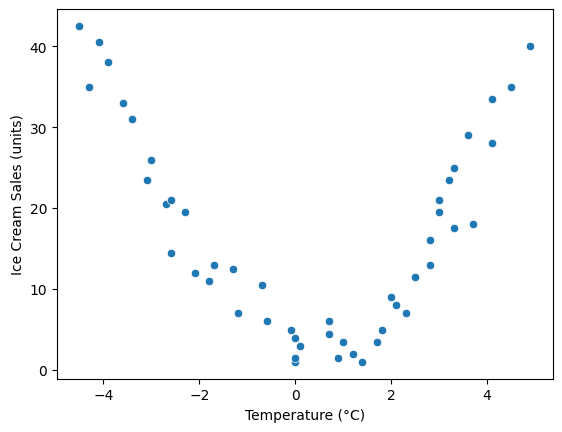

In [27]:
#Visualizing the dataset
sns.scatterplot(x='Temperature (°C)',y='Ice Cream Sales (units)',data=df)


#As we can see above this is a non-linear relationship

In [28]:
#Train-Test-Split
X = df[['Temperature (°C)']]
Y = df['Ice Cream Sales (units)']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [29]:
#Standardization
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.69700575],
       [ 1.44235872],
       [ 1.58740037],
       [ 1.29731706],
       [-0.29814119],
       [ 0.31828586],
       [ 0.28202545],
       [ 0.20950462],
       [ 0.60836918],
       [-0.0805787 ],
       [-0.80578699],
       [-1.34969321],
       [ 0.78967125]])

In [30]:
#Creating object of linear regression and training our model
Linear_regression = LinearRegression(n_jobs=-1)
Linear_regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [31]:
#Checking Performance of Model
Y_pred = Linear_regression.predict(X_test)
R_Squared = r2_score(Y_test,Y_pred)
print(R_Squared)

-0.21603793613788813


##As we can see above that model accuracy is very bad even more bad than the mean that's why we have to use polynomial regression for this Non-linear relationship between Independent and Dependent features

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

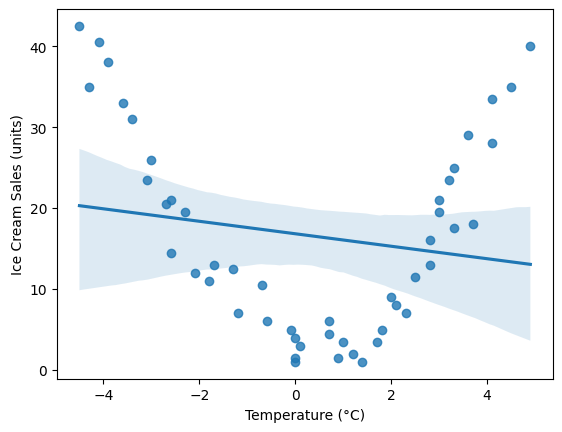

In [32]:
sns.regplot(x='Temperature (°C)',y='Ice Cream Sales (units)',data=df)

#As we can see in the above graph how much the data points are away from the predicted points or best fit line showing very large error so now we will use polynomial regression to solve this problem

In [33]:
#Transforming the linear regression equation to polynomial equation
#Polynomial Transfromation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2 ,include_bias=True)#The degree argument determine the degree of polynomial equation and The include_bias argument determines whether or not to include a bias (intercept) term in the generated polynomial feature set.


X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#1. fit_transform()
The fit_transform() function performs two operations:

Fit: Learns the parameters (like mean, variance, or scaling factors) from the input data.
Transform: Applies the learned parameters to transform the data.
It is typically used when working with the training data, where the model or transformer needs to "learn" from the data before applying the transformation.
Explanation:

The StandardScaler computes the mean and standard deviation of X_train during fit.
Then, it scales the data using these learned parameters.

2. transform()
The transform() function only applies the transformation using parameters that were already learned during the fit or fit_transform step. It does not compute or learn new parameters.

It is typically used with new data (like test data or unseen data), where you want to apply the same transformation learned from the training data.
Explanation:

The StandardScaler uses the mean and standard deviation computed from X_train to scale X_test.

In [34]:
X_test_poly
#               x^0         x^1            x^2  of h0(x) = B0 + B1x^0 + B2x^1 +B3x^2
#               |          |             |
# #array([[ 1.        , -1.81893761,  3.30853403],
#        [ 1.        ,  3.70405744, 13.72004151],
#        [ 1.        ,  4.13353379, 17.08610158],
#        [ 1.        ,  3.61077848, 13.03772121],
#        [ 1.        , -0.77333004,  0.59803936],

array([[ 1.000e+00, -1.800e+00,  3.240e+00],
       [ 1.000e+00,  4.100e+00,  1.681e+01],
       [ 1.000e+00,  4.500e+00,  2.025e+01],
       [ 1.000e+00,  3.700e+00,  1.369e+01],
       [ 1.000e+00, -7.000e-01,  4.900e-01],
       [ 1.000e+00,  1.000e+00,  1.000e+00],
       [ 1.000e+00,  9.000e-01,  8.100e-01],
       [ 1.000e+00,  7.000e-01,  4.900e-01],
       [ 1.000e+00,  1.800e+00,  3.240e+00],
       [ 1.000e+00, -1.000e-01,  1.000e-02],
       [ 1.000e+00, -2.100e+00,  4.410e+00],
       [ 1.000e+00, -3.600e+00,  1.296e+01],
       [ 1.000e+00,  2.300e+00,  5.290e+00]])

In [35]:
#Creating object of linear regression and training our model with the transformed data 
Linear_regression_poly = LinearRegression(n_jobs=-1)
Linear_regression_poly.fit(X_train_poly,Y_train)

LinearRegression(n_jobs=-1)

In [36]:
#Checking Performance of Model
Y_pred_poly = Linear_regression_poly.predict(X_test_poly)
R_Squared_poly = r2_score(Y_test,Y_pred_poly)
print(R_Squared_poly)

0.9235177033423546


#As we can see after transforming the data and regression into polynomial form how much our performance has improved


In [37]:
#Adjusted R_Squared
Adj_R_Squared = 1 - (1-R_Squared_poly)*(len(Y_test) - 1) / (len(Y_test) - X_test_poly.shape[1] -1)
print(Adj_R_Squared)

0.8980236044564728


In [38]:
print(Linear_regression_poly.coef_)
#Here we can see that now we have three coeficients i.e, B1,B2,B3

[ 0.         -1.00298573  1.82006857]


In [39]:
print(Linear_regression_poly.intercept_)
#But we still have only one intercept i.e, B0

3.808209075123278


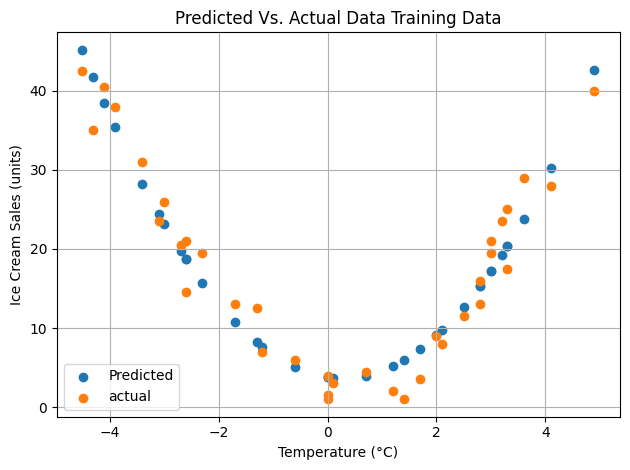

In [40]:
#Visualizing Model Accuracy
plt.scatter(x=X_train,y=Linear_regression_poly.predict(X_train_poly),label ='Predicted')
plt.scatter(x=X_train,y=Y_train,label = 'actual')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Predicted Vs. Actual Data Training Data')
plt.legend()
plt.grid()
plt.tight_layout()

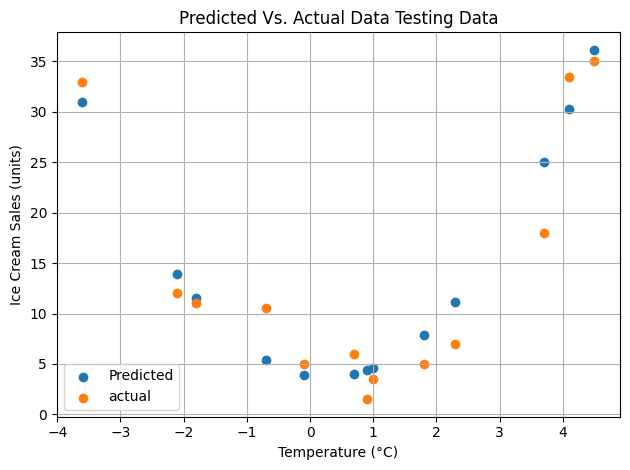

In [41]:
#Visualizing Model Accuracy
plt.scatter(x=X_test,y=Y_pred_poly,label ='Predicted')
plt.scatter(x=X_test,y=Y_test,label = 'actual')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Predicted Vs. Actual Data Testing Data')
plt.grid()
plt.legend()
plt.tight_layout()

In [42]:
#Predicting for new data set
testing = pd.read_csv(r'D:\Programming\Study\Machine Learning\Datasets\ice_creame_testing.csv')
x_new = testing[['Temperature (°C)']]
y_new = testing['Ice Cream Sales (units)']

x_new_poly = poly.transform(x_new)

y_pred_new = Linear_regression_poly.predict(x_new_poly)




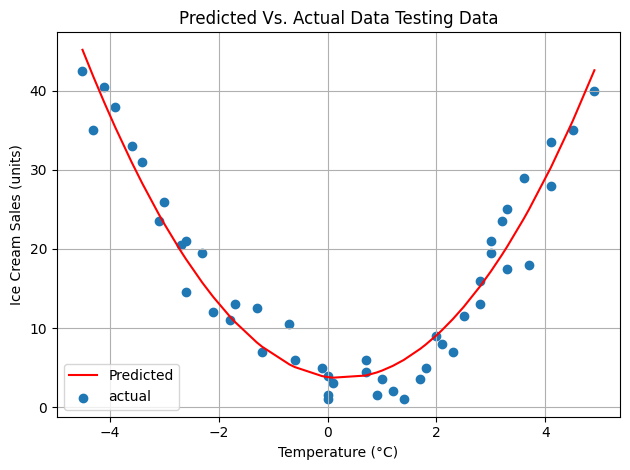

In [43]:
#Visualizing Model Accuracy
plt.plot(x_new,y_pred_new,label ='Predicted',color ='red')
plt.scatter(x=x_new,y=y_new,label = 'actual')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Predicted Vs. Actual Data Testing Data')
plt.grid()
plt.legend()
plt.tight_layout()

##Pipelining


In [44]:
from sklearn.pipeline import Pipeline
def poly_regression(degree, X_train, Y_train, X_test, Y_test,X_new):
    # Create a pipeline that includes scaling, polynomial features, and linear regression
    # The pipeline will apply these transformations in sequence
    poly_regression = Pipeline([
        ('scaler', StandardScaler()),  # Step 1: Standardize the features
        ('poly', PolynomialFeatures(degree=degree, include_bias=True)),  # Step 2: Generate polynomial features
        ('linear_regression', LinearRegression(n_jobs=-1))  # Step 3: Fit a linear regression model
    ])
    
    # Fit the pipeline on the training data
    # This will apply all the steps in the pipeline to the training data
    poly_regression.fit(X_train, Y_train)
    
    # Predict using the pipeline on the test data
    # The pipeline will apply the same transformations to the test data before making predictions
    # Note: The fit method is NOT called on the test data, only the transformations learned from the training data are applied
    Y_pred_poly = poly_regression.predict(X_new)
    
    # Plot the actual vs predicted values
    plt.scatter(X_test, Y_test,color = 'b', label='Test')  # Scatter plot of Test values
    plt.scatter(X_train, Y_train,color = 'g', label='Training')  # Scatter plot of Training values
    plt.plot(X_new, Y_pred_poly,color = 'red', label='Predicted')  # Line plot of predicted values
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales (units)')
    plt.title('Accuracy of Polynomial Regression Model')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Return the R^2 score to evaluate the model's performance
    return r2_score(Y_test, Y_pred_poly)


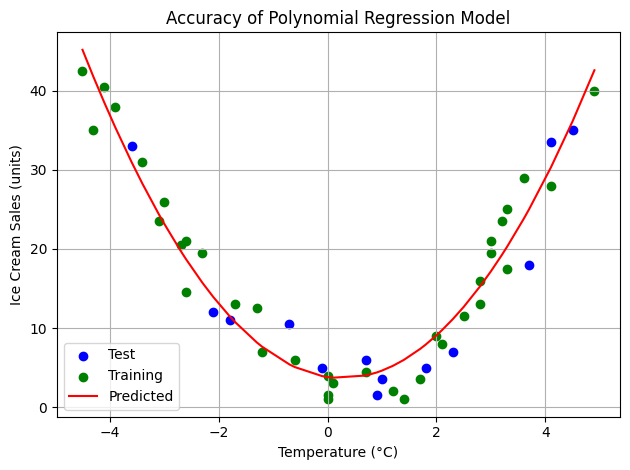

ValueError: Found input variables with inconsistent numbers of samples: [13, 49]

In [45]:
# Test the function with a degree of 2
poly_regression(2, X_train, Y_train, X_test, Y_test,x_new)